<a href="https://colab.research.google.com/github/auliarahmahh/CNN/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


0


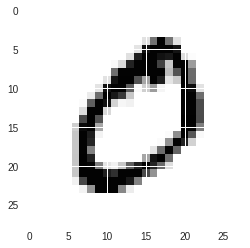

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 1
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
#Array 4 dimensi
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Normalisasi
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
# CNN
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Sequential Model and penambahan layer
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 48s 803us/step - loss: 0.2054 - acc: 0.9382
Epoch 2/10
60000/60000 [==============================] - 47s 789us/step - loss: 0.0818 - acc: 0.9753
Epoch 3/10
60000/60000 [==============================] - 49s 815us/step - loss: 0.0568 - acc: 0.9822
Epoch 4/10
60000/60000 [==============================] - 47s 785us/step - loss: 0.0436 - acc: 0.9854
Epoch 5/10
60000/60000 [==============================] - 47s 786us/step - loss: 0.0341 - acc: 0.9887
Epoch 6/10
60000/60000 [==============================] - 46s 774us/step - loss: 0.0271 - acc: 0.9908
Epoch 7/10
60000/60000 [==============================] - 47s 780us/step - loss: 0.0251 - acc: 0.9917
Epoch 8/10
60000/60000 [==============================] - 47s 779us/step - loss: 0.0219 - acc: 0.9927
Epoch 9/10
60000/60000 [==============================] - 48s 795us/step - loss: 0.0174 - acc: 0.9938
Epoch 10/10
60000/60000 [=========

In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 234us/step


[0.06494442834985893, 0.9835]

NameError: ignored

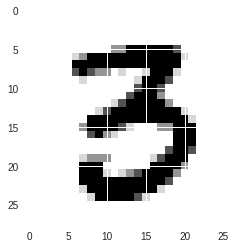

In [0]:
image_index = 5555
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, img_rows, img_cols, 1))
print(pred.argmax())